In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Regression metric 중 하나인 OutputLog class의 결과를 분석하는 코드.
train과 valid 결과 csv를 읽어와 정확도, mae, KDE 그래프를 그리는 코드이다.
맛 데이터 예측에 한정되어 작동한다. 

In [6]:
# Read csv file.
# 경로는 직접 지정을 해 주어야 한다.
df = pd.read_csv('valid_output_data.csv')
train_df = pd.read_csv('train_output_data.csv')

In [7]:
# 등급 정보가 들어가 있지 않기 때문에 파일 이름에서 등급 정보 추출.
df['grade'] = df['file_name'].str.split('_').str[3]
train_df['grade'] = train_df['file_name'].str.split('_').str[3]

In [8]:
# data 개수와 등급 별 개수를 출력하고 등급 별 맛데이터 정확도를 계산한다.
name = ['Marbling', 'bright_color', 'Texture', 'Surface Moisture', 'Total']
grade = ['1++', '1+', '2', '3']

print('output 개수 :', len(df))
print('1++ 개수 :', len(df[(df['grade'] == '1++')]))
print('1+ 개수 :', len(df[(df['grade'] == '1+')]))
print('2 개수 :', len(df[(df['grade'] == '2')]))
print('3 개수 :', len(df[(df['grade'] == '3')]))
print()
for n in name:
  for g in grade:
    g_df = df[df['grade'] == g]
    correct = len(g_df[round(g_df[f'predict {n}'],0) == g_df[f'label {n}']])
    print(f'{g} {n} Accuracy:', round(correct / len(g_df),4), f'({correct}/{len(g_df)})')
  print()

output 개수 : 169
1++ 개수 : 48
1+ 개수 : 49
2 개수 : 46
3 개수 : 26

1++ Marbling Accuracy: 0.5833 (28/48)
1+ Marbling Accuracy: 0.449 (22/49)
2 Marbling Accuracy: 0.7609 (35/46)
3 Marbling Accuracy: 0.6923 (18/26)

1++ bright_color Accuracy: 0.7708 (37/48)
1+ bright_color Accuracy: 0.551 (27/49)
2 bright_color Accuracy: 0.8043 (37/46)
3 bright_color Accuracy: 0.8077 (21/26)

1++ Texture Accuracy: 0.6667 (32/48)
1+ Texture Accuracy: 0.6735 (33/49)
2 Texture Accuracy: 0.5652 (26/46)
3 Texture Accuracy: 0.8077 (21/26)

1++ Surface Moisture Accuracy: 0.6042 (29/48)
1+ Surface Moisture Accuracy: 0.4694 (23/49)
2 Surface Moisture Accuracy: 0.5 (23/46)
3 Surface Moisture Accuracy: 0.6538 (17/26)

1++ Total Accuracy: 0.6875 (33/48)
1+ Total Accuracy: 0.449 (22/49)
2 Total Accuracy: 0.4783 (22/46)
3 Total Accuracy: 0.7692 (20/26)



In [9]:
# MAE 계산
print('MAE (절대 오차 평균)\n')
for n in name:
  err = round(np.mean(np.abs(df[f'predict {n}'] - df[f'label {n}'])),4)
  print(f'{n} = {err}')
print()
print('등급별 MAE\n')
for n in name:
  for g in grade:
    g_df = df[df['grade'] == g]
    print(f'{g} {n}:', round(np.mean(np.abs(g_df[f'predict {n}'] - g_df[f'label {n}'])),4))
  print()

MAE (절대 오차 평균)

Marbling = 0.4656
bright_color = 0.3846
Texture = 0.4625
Surface Moisture = 0.5167
Total = 0.4795

등급별 MAE

1++ Marbling: 0.4726
1+ Marbling: 0.6014
2 Marbling: 0.3438
3 Marbling: 0.4119

1++ bright_color: 0.3329
1+ bright_color: 0.4954
2 bright_color: 0.3217
3 bright_color: 0.3823

1++ Texture: 0.412
1+ Texture: 0.4963
2 Texture: 0.539
3 Texture: 0.357

1++ Surface Moisture: 0.4926
1+ Surface Moisture: 0.5606
2 Surface Moisture: 0.5454
3 Surface Moisture: 0.4277

1++ Total: 0.3945
1+ Total: 0.6098
2 Total: 0.5502
3 Total: 0.2654



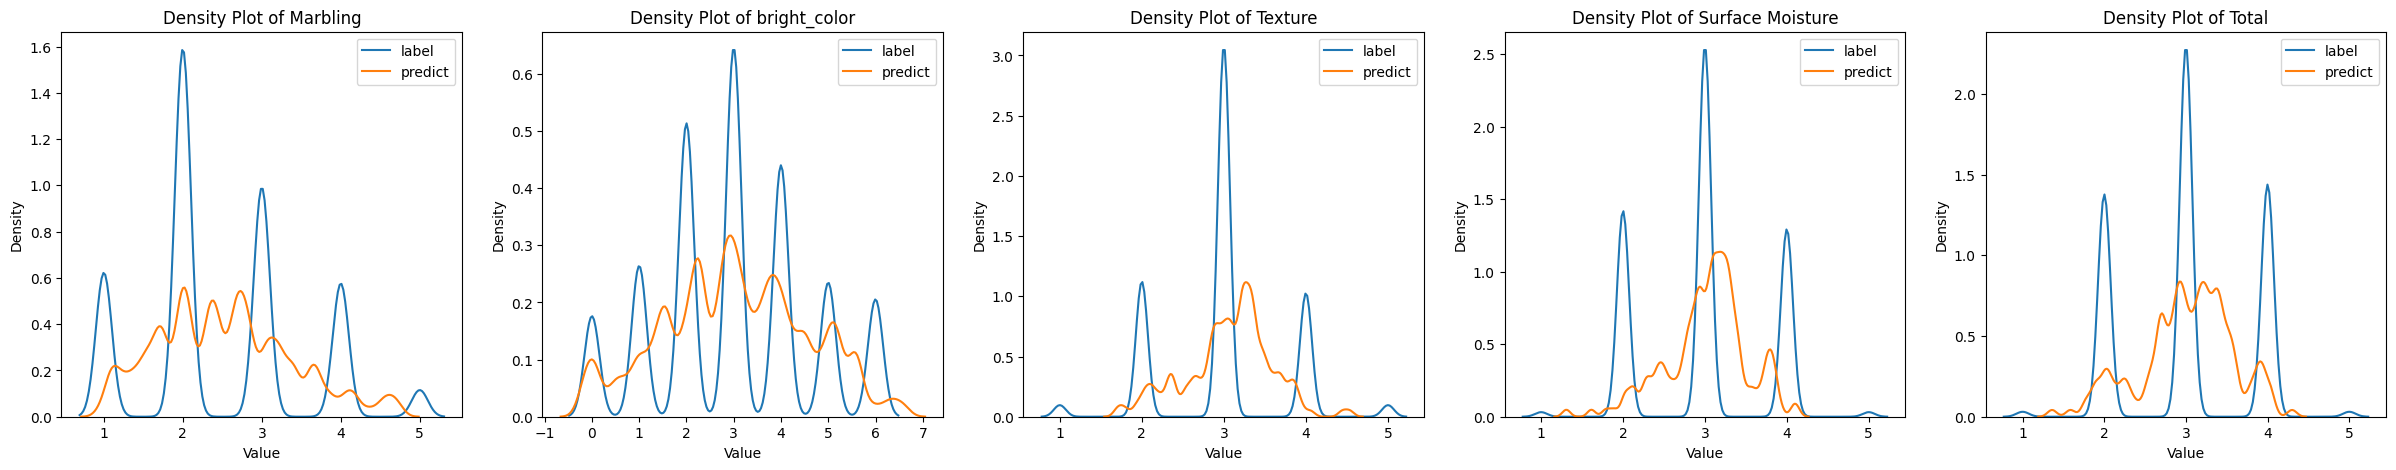

In [10]:
# 맛 데이터 밀도 추정 그래프 그리기
plt.figure(figsize=(30,5))
i=0
for n in name:
  i += 1
  plt.subplot(1,5,i)
  sns.kdeplot(df[f'label {n}'],bw_method=0.1)
  sns.kdeplot(df[f'predict {n}'],bw_method=0.1)
  plt.xlabel('Value')
  plt.ylabel('Density')
  plt.title(f'Density Plot of {n}')
  plt.legend(labels=['label', 'predict'])
plt.show()

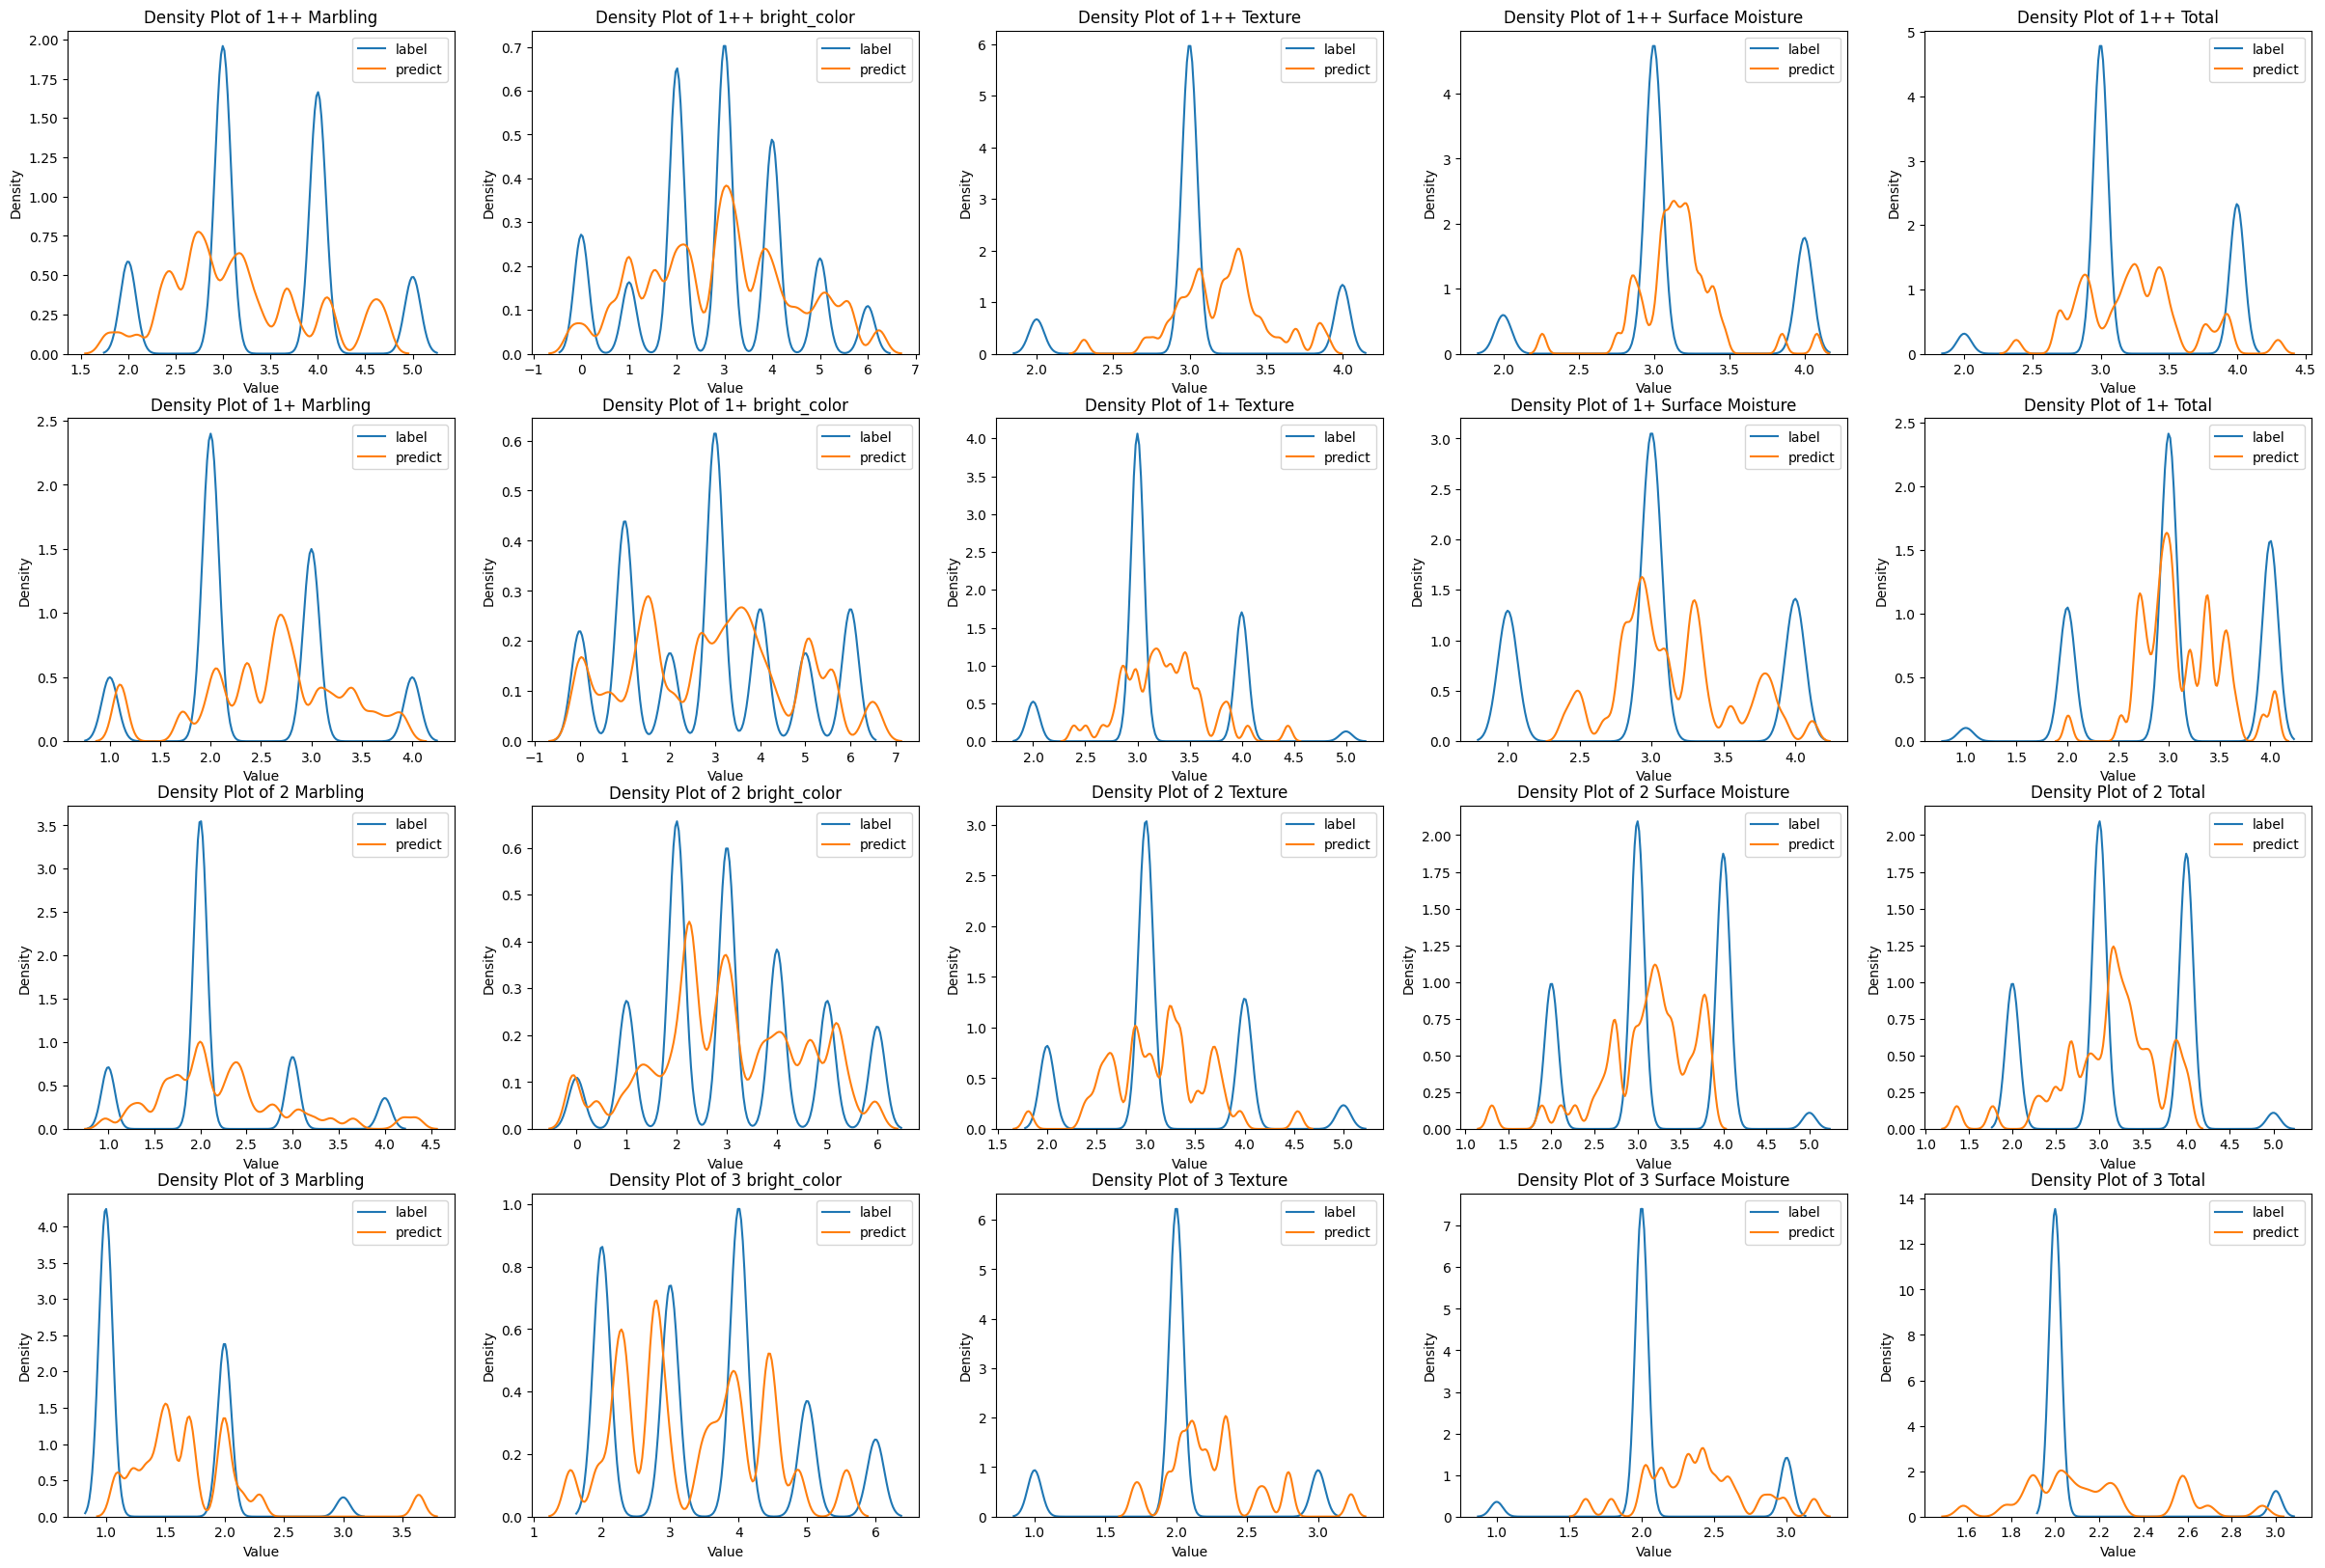

In [11]:
# 등급 별 맛 데이터 밀도 추정 그래프 그리기
plt.figure(figsize=(30,20))
i=0
for g in grade:
  for n in name:
    i+=1
    plt.subplot(4,5,i)
    g_df = df[df['grade'] == g]
    sns.kdeplot(g_df[f'label {n}'],bw_method=0.1)
    sns.kdeplot(g_df[f'predict {n}'],bw_method=0.1)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(f'Density Plot of {g} {n}')
    plt.legend(labels=['label', 'predict'])
plt.show()

In [6]:
# 위와 똑같은 방법으로 train_csv에 대해 계산.
grade = ['1++', '1+', '2', '3']
print('output 개수 :', len(train_df))
print('1++ 개수 :', len(train_df[(train_df['grade'] == '1++')]))
print('1+ 개수 :', len(train_df[(train_df['grade'] == '1+')]))
print('2 개수 :', len(train_df[(train_df['grade'] == '2')]))
print('3 개수 :', len(train_df[(train_df['grade'] == '3')]))

for n in name:
  for g in grade:
    g_df = train_df[train_df['grade'] == g]
    correct = len(g_df[round(g_df[f'predict {n}'],0) == g_df[f'label {n}']])
    print(f'{g} {n} Accuracy:', round(correct / len(g_df),4), f'({correct}/{len(g_df)})')
  print()

output 개수 : 1518
1++ 개수 : 391
1+ 개수 : 449
2 개수 : 454
3 개수 : 224


In [ ]:
print('MAE (절대 오차 평균)\n')
for n in name:
  err = round(np.mean(np.abs(train_df[f'predict {n}'] - train_df[f'label {n}'])),4)
  print(f'{n} = {err}')
print()
print('등급별 MAE\n')
for n in name:
  for g in grade:
    g_df = train_df[train_df['grade'] == g]
    print(f'{g} {n}:', round(np.mean(np.abs(g_df[f'predict {n}'] - g_df[f'label {n}'])),4))
  print()

MAE (절대 오차 평균)

Color = 0.3686

등급별 MAE

1++ Color: 0.3437
1+ Color: 0.3958
2 Color: 0.3486
3 Color: 0.3979



In [ ]:
# 밀도 추정 그래프 그리기
plt.figure(figsize=(30,5))
i=0
for n in name:
  i += 1
  plt.subplot(1,5,i)
  sns.kdeplot(train_df[f'label {n}'],bw_method=0.1)
  sns.kdeplot(train_df[f'predict {n}'],bw_method=0.1)
  plt.xlabel('Value')
  plt.ylabel('Density')
  plt.title(f'Density Plot of {n}')
  plt.legend(labels=['label', 'predict'])
plt.show()

In [ ]:
# 밀도 추정 그래프 그리기
plt.figure(figsize=(30,20))
i=0
for g in grade:
  for n in name:
    i+=1
    plt.subplot(4,5,i)
    g_df = train_df[train_df['grade'] == g]
    sns.kdeplot(g_df[f'label {n}'],bw_method=0.1)
    sns.kdeplot(g_df[f'predict {n}'],bw_method=0.1)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(f'Density Plot of {g} {n}')
    plt.legend(labels=['label', 'predict'])
plt.show()